#### $\text{Q1: Orthogonalization Procedures}$

In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [2]:
def hilbert_matrix(n):
    '''
    Initialize a Hilbert matrix of order n x n
    '''
    H = [[1/(i+j+1) for j in range(n)] for i in range(n)]
    H = np.array(H)
    return H

In [3]:
def classicalGS_orthogonalize(M):
    '''
    returns QR decomposition of a matrix M
    using the classical Graham-Schmidt 
    Orthognalization
    
    Reference: 
    Classics in Applied Mathematics
    Michael  T. Heath
    '''
    dim = M.shape
    n = dim[1]
    
    Q = np.zeros(dim)
    R = np.zeros(dim)
    
    for k in range(n):
        Q[:,k] = M[:,k]
        for j in range(k):
            R[j,k] = np.matmul(Q[:,j].T,M[:,k])
            Q[:,k] = np.subtract(Q[:,k],R[j,k]*Q[:,j])
        R[k,k] = npla.norm(Q[:,k],2)
        if R[k,k] == 0:
            return -1
        Q[:,k] = Q[:,k]/R[k,k]
    
    return Q,R        

In [4]:
def modifiedGS_orthogonalize(M):
    '''
    returns QR decomposition of a matrix M
    using the modified Graham-Schmidt 
    Orthognalization
    
    Reference: 
    Classics in Applied Mathematics
    Michael  T. Heath
    '''
    dim = M.shape
    n = dim[1]
    
    Q = np.zeros(dim)
    R = np.zeros(dim)
    
    for k in range(n):
        R[k,k] = npla.norm(M[:,k],2)
        if R[k,k] == 0:
            return -1
        Q[:,k] = M[:,k]/R[k,k]
        for j in range(k+1,n):
            R[k,j] = np.matmul(Q[:,k].T,M[:,j])
            M[:,j] = np.subtract(M[:,j],R[k,j]*Q[:,k])
    
    return Q,R

In [5]:
OrthogonalityLoss_classic = []
OrthogonalityLoss_modified = []
x = np.arange(2,13,1)

for i in x:
    
    H = hilbert_matrix(i)
    
    I = np.eye(i)
    
    Q,R = classicalGS_orthogonalize(H)
    loss = npla.norm(np.subtract(I,np.matmul(Q.T,Q)),2)
    loss = -np.log10(loss)
    OrthogonalityLoss_classic.append(loss)
    
    Q,R = modifiedGS_orthogonalize(H)
    loss = npla.norm(np.subtract(I,np.matmul(Q.T,Q)),2)
    loss = -np.log10(loss)
    OrthogonalityLoss_modified.append(loss)

In [6]:
ROrthogonalityLoss_classic = []

for i in x:
    
    H = hilbert_matrix(i)
    I = np.eye(i)
    
    Q,R = classicalGS_orthogonalize(H.copy())
    Q,R = classicalGS_orthogonalize(Q.copy())
    
    loss = npla.norm(np.subtract(I,np.matmul(Q.T,Q)),2)
    loss = -np.log10(loss)
    
    ROrthogonalityLoss_classic.append(loss)

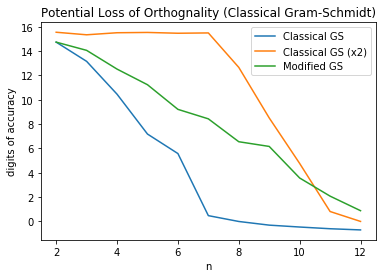

In [7]:
plt.plot(x,OrthogonalityLoss_classic,label='Classical GS')
plt.plot(x,ROrthogonalityLoss_classic,label='Classical GS (x2)')
plt.plot(x,OrthogonalityLoss_modified, label = 'Modified GS')
plt.title('Potential Loss of Orthognality (Classical Gram-Schmidt)')
plt.xlabel('n')
plt.ylabel('digits of accuracy')
plt.legend(loc='best')
plt.show()


#### $\text{Q1(a):}$
$\text{From the plots, we can infer that the orthognality loss in modified graham schmidt is}$
$\text{lesser as compared to the classical method for } n \leq 12.$
$\text{However, applying the classical procedure twice yields more accurate results than the}$
$\text{modified procedure till }n = 10.$

In [8]:
OrthogonalityLoss = []

x = np.arange(2,13,1)

for i in x:
    
    H = hilbert_matrix(i)
    I = np.eye(i)
    
    Q,R = npla.qr(H)
    loss = npla.norm(I - np.matmul(Q.T,Q),2)
    loss = -np.log10(loss)
    
    OrthogonalityLoss.append(loss)

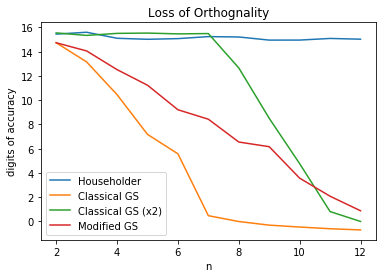

In [9]:
plt.plot(x,OrthogonalityLoss, label = 'Householder')
plt.plot(x,OrthogonalityLoss_classic,label='Classical GS')
plt.plot(x,ROrthogonalityLoss_classic,label='Classical GS (x2)')
plt.plot(x,OrthogonalityLoss_modified, label = 'Modified GS')
plt.title('Loss of Orthognality')
plt.legend(loc = 'best')
plt.xlabel('n')
plt.ylabel('digits of accuracy')
plt.show()

#### $\text{Q1(b):}$
$\text{The Householder method gives highly accurate results as compared to the other methods}$
$\text{for all values of n. Only the classical procedure when used twice outperforms it for certain}$
$\text{values where }n < 8.$

In [10]:
OrthogonalityLoss_cholesky = []
x_axis = np.arange(2,10,1)

for i in range(2,10):
    
    H = hilbert_matrix(i)
    I = np.eye(i)
    
    A = np.matmul(H.T,H)
    L = npla.cholesky(A)
    L_T = npla.inv(L).T
    
    Q = np.matmul(H,L_T)
    
    loss = npla.norm(I - np.matmul(Q.T,Q),2)
    loss = -np.log10(loss)
    
    OrthogonalityLoss_cholesky.append(loss)

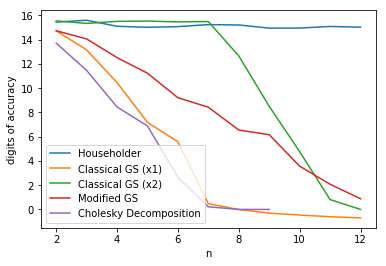

In [11]:
plt.plot(x,OrthogonalityLoss, label = 'Householder')
plt.plot(x,OrthogonalityLoss_classic,label='Classical GS (x1)')
plt.plot(x,ROrthogonalityLoss_classic,label='Classical GS (x2)')
plt.plot(x,OrthogonalityLoss_modified, label = 'Modified GS')
plt.plot(x_axis,OrthogonalityLoss_cholesky, label = 'Cholesky Decomposition')
plt.title('')
plt.legend(loc = 'best')
plt.xlabel('n')
plt.ylabel('digits of accuracy')
plt.show()

#### $\text{Q1(c):}$
$\text{As we can see from the plot, the Cholesky Decomposition method produces lesser accurate}$
$\text{results as compared to the other methods used so far}$

#### $\text{Q1(d):}$
$\text{The relative quality of the results produced can be explained as follows:}$
+ $\text{The Classical Graham Schmidt procedure fails to produce accurate results because of the}$
$\text{loss in orthogonality due to floating point errors in computation.}$
+ $\text{The Classical Graham Schmidt procedure, when applied twice performs slightly better}$
$\text{than when it's applied once but as n increases, the loss in orthogonality also increases}$
$\text{and an additional application of the Classical procedure doesn't suffice.}$
+ $\text{With the modified Gram-Schmidt procedure, cancellation can occur when components}$
$\text{in one vector are subtracted from another, leading to a significant loss of}$
$\text{orthogonality among the columns of Q when A is ill-conditioned, though
the loss}$
$\text{is much less severe than with classical Gram-Schmidt.}$
+ $\text{The Householder transformation takes several steps to ensure accuracy and numerical}$ 
$\text{stability. It chooses the sign of the norm before division in order to avoid cancellation.}$
$\text{It also counters another numerical difficulty of overflow and underflow by scaling}$
$\text{before the computation of }||\alpha||_{2}\text{, thereby producing the most accurate solution.}$

$\text{Discussion Partners: Siddhartha Jain, Aarush Talwar, Prakhar Gupta}$

#### $\text{Ashwin Singh}$
<br/>

#### $\text{2017222}$